# Thompson Sampling

## Motivation

In a [previous notebook](./ucb.ipynb), we have learned how UCB can identify quickly the optimal arm in classical [Multi-Armed Bandits](https://banditalgs.com/2016/09/18/the-upper-confidence-bound-algorithm/). Now, we learn how [Thompson Sampling]() -- developed by [W. Thompson]() in 1933 -- leverages a Bayesian perspective to tackle this problem.

In addition to determining the optimal arm, the Bayesian viewpoint also allows to create confidence intervals for the parameters of the underlying bandit.

More precisely, we assume that we have a prior intuition on kind of bandits we may encounter in our application scenario. This belief is encoded in a **prior distribution** $Q(\theta)$ over all bandits.

As we play a given bandit for $N$ rounds by performing actions $A_1, A_2, \dots, A_n$ and receiving rewards $R_1, R_2, \dots, R_n$. This data should lead to us to update our initial, potentially naïve, prior beliefs. This leads to a **posterior distribution** $Q(\theta | A_1, R_1, \dots, A_n, R_n)$ computed via [Bayes' Theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem):
$$Q(\theta |  A_1, R_1, \dots, A_n, R_n) = \frac{Q(\theta ,  A_1, R_1, \dots, A_n, R_n)}{\int_\theta Q(A_1, R_1, \dots, A_n, R_n|\theta) Q(\theta) {\rm d}\theta}$$

Thompson sampling is based on two simple steps:

**Sample parameter from the posterior**

**Pick the arm with the highest reward under this parameter**

## Example: Beta-Bernoulli bandit

To explain the general idea at a specific example, we present *Beta-Bernoulli Bandits* following the lucid blogpost by [Peter Roelants](https://peterroelants.github.io/).

More precisely, a Bernoulli bandit returns rewards in $\{0, 1\}$ and we write $\mu_i$ for the success probability of the $i$th arm. We use a $\mathsf{Beta}(\alpha, \beta)$ prior for each $\mu_i$, [recalling](https://en.wikipedia.org/wiki/Beta_distribution) that the $\mathsf{Beta}(\alpha, \beta)$ distribution is a probability distribution on $[0, 1]$ with unnormalized density
$$p_{\alpha, \beta}(x) \propto x^{\alpha - 1}(1 - x)^{\beta - 1}.$$

The beta distribution is particularly popular in Bayesian contexts, since the posterior distribution is again a beta distribution with adapted parameters. More precisely, if an arm was played $k \le n$ times with $s \le k$ successes, then the posterior is a $\mathsf{Beta}(\alpha + s, \beta + (k - s))$ distribution.

## Simulation

For the simulation, we initialize the Bayesian parameters as $\alpha = \beta = 1$. We take a specific 2-armed Bernoulli-bandit with success probabilities $\mu_1 = 0.5$ and $\mu_2 = 0.55$.

In [2]:
import numpy as np

seed = 42
np.random.seed(seed)

#initial beta parameters
alphas = np.ones(2)
betas = np.ones(2)

#success probs
mus = [.5, .55]

#episodes
N = 1000

#action trace
trace_a = []

Then, we play the bandit for $N = 1000$ episodes.

In [3]:
ks = np.zeros(2)
ss = np.zeros(2)

for _ in range(N):
    #sample parameters according to posterior
    succ_probs = np.random.beta(alphas + ss, betas + ks - ss)

    #select action with highest success probability
    a = np.argmax(succ_probs)

    #retrieve rewards
    r = np.random.rand() < mus[a]

    #update history
    ks[a] += 1
    ss[a] += r

    #remember actions
    trace_a += [a]

A plot of the trace reveals that Thompson sampling quickly identifies arm 1 as the optimal arm.

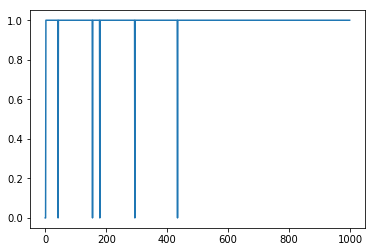

In [3]:
import seaborn as sns
%matplotlib inline

sns.lineplot(np.arange(N), trace_a)